In [1]:
import numpy as np
import matplotlib.pyplot as plt
from BranchCut import addresidues, wrap, makephase, find_residues

In [2]:
def line(i1,j1,i2,j2):
    
    if abs(i2-i1) >= abs(j2-j1):
        if i1 > i2:
            i1,j1,i2,j2 = i2,j2,i1,j1
        i = np.arange(i1+1,i2+1)
        j = (j2-j1)/(i2-i1)*(i-i1)+j1
    else:
        if j1 > j2:
            i1,j1,i2,j2 = i2,j2,i1,j1
        j = np.arange(j1+1,j2+1)
        i = (i2-i1)/(j2-j1)*(j-j1)+i1
    
    return np.ceil(i).astype(int),np.ceil(j).astype(int)

In [3]:
A = np.array([1,2,3,3,5,4,6,7,8,9,9,0])
np.save("example_1", A, )

In [4]:
layer = np.zeros(())

In [38]:
data = makephase(10)

resloc = np.array([[1,2],
                   [2,5],
                   [2,7],
                   [4,4],
                   [8,2],
                   [7,6],
                   [8,8],])

data_point_res = addresidues(data, resloc) 

data_wrap_res = wrap(data_point_res)
data_wrap = wrap(data)

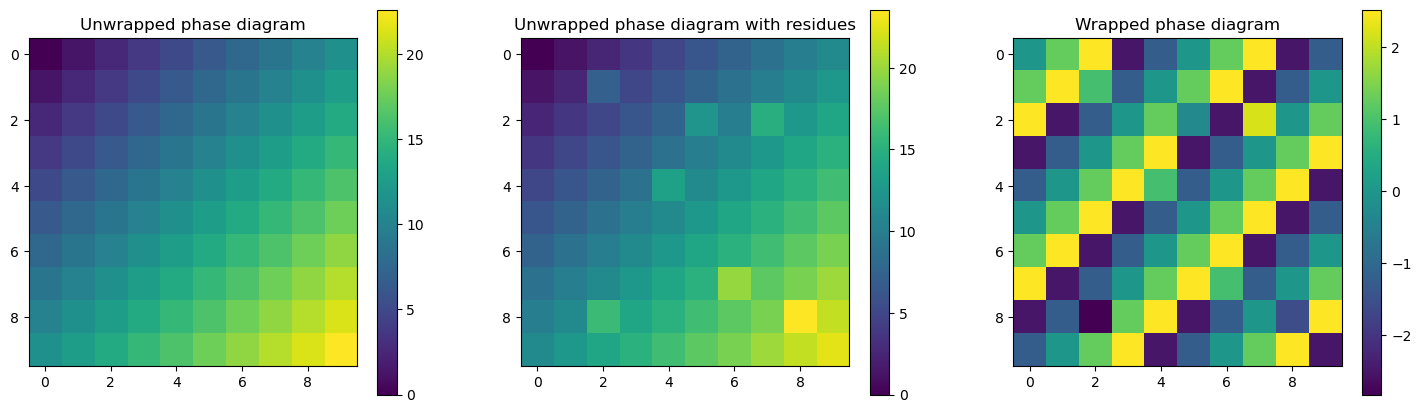

In [26]:
fig, ax = plt.subplots(1,3, figsize=(18,5))
image = ax[0].imshow(data)
ax[0].set_title('Unwrapped phase diagram')
plt.colorbar(image, ax=ax[0])
image = ax[1].imshow(data_point_res)
ax[1].set_title('Unwrapped phase diagram with residues')
plt.colorbar(image, ax=ax[1])
image = ax[2].imshow(data_wrap)
ax[2].set_title('Wrapped phase diagram')
plt.colorbar(image, ax=ax[2])
plt.show()

In [36]:
def find_residues(data):
    # Can be parallelized
    up      = data[:-1,1:]-data[:-1,:-1]
    right   = data[1:,1:]-data[:-1,1:]
    down    = data[1:,:-1]-data[1:,1:]
    left    = data[:-1,:-1]-data[1:,:-1]

    residue_map = up + right + down + left
    print(data.round(2))
    print(up.round(2))
#    print(right.round(2))
#    print(down.round(2))
#    print(left.round(2))
#    print(residue_map)

In [ ]:
find_residues(data)

[[ 0.    1.26  2.51 -2.51 -1.26  0.    1.26  2.51 -2.51 -1.26]
 [ 1.26  2.51  0.94 -1.26  0.    1.26  2.51 -2.51 -1.26  0.  ]
 [ 2.51 -2.51 -1.26  0.    1.26 -0.31 -2.51  2.2   0.    1.26]
 [-2.51 -1.26  0.    1.26  2.51 -2.51 -1.26  0.    1.26  2.51]
 [-1.26  0.    1.26  2.51  0.94 -1.26  0.    1.26  2.51 -2.51]
 [ 0.    1.26  2.51 -2.51 -1.26  0.    1.26  2.51 -2.51 -1.26]
 [ 1.26  2.51 -2.51 -1.26  0.    1.26  2.51 -2.51 -1.26  0.  ]
 [ 2.51 -2.51 -1.26  0.    1.26  2.51  0.94 -1.26  0.    1.26]
 [-2.51 -1.26 -2.83  1.26  2.51 -2.51 -1.26  0.   -1.57  2.51]
 [-1.26  0.    1.26  2.51 -2.51 -1.26  0.    1.26  2.51 -2.51]]
[[ 1.26  1.26 -5.03  1.26  1.26  1.26  1.26 -5.03  1.26]
 [ 1.26 -1.57 -2.2   1.26  1.26  1.26 -5.03  1.26  1.26]
 [-5.03  1.26  1.26  1.26 -1.57 -2.2   4.71 -2.2   1.26]
 [ 1.26  1.26  1.26  1.26 -5.03  1.26  1.26  1.26  1.26]
 [ 1.26  1.26  1.26 -1.57 -2.2   1.26  1.26  1.26 -5.03]
 [ 1.26  1.26 -5.03  1.26  1.26  1.26  1.26 -5.03  1.26]
 [ 1.26 -5.03  1.26  1.26  